<a href="https://colab.research.google.com/github/MargaridaVitolo/Educ360/blob/main/MatPlotLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title MatPlotLib

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/profivan-ai/cdb-Python/refs/heads/main/arquivos/alunos_cursos.csv',sep=';')

# verificar nulos
df.isnull().sum()


In [ ]:
# eliminar uma coluna
df.drop('Projetos',axis=1,inplace=True)
df

In [ ]:
df["Aprovado"] = (df["Nota"] >= 7.5) & (df["Presença"] >= 7.5)

df.Aprovado.value_counts()

In [6]:
def desempenho(nota):
  if nota >= 8.0:
    return "Alto"
  elif nota >= 6.0:
    return "Médio"
  else:
    return "Baixo"

In [ ]:
df["Desempenho"] = df["Nota"].apply(desempenho)
df

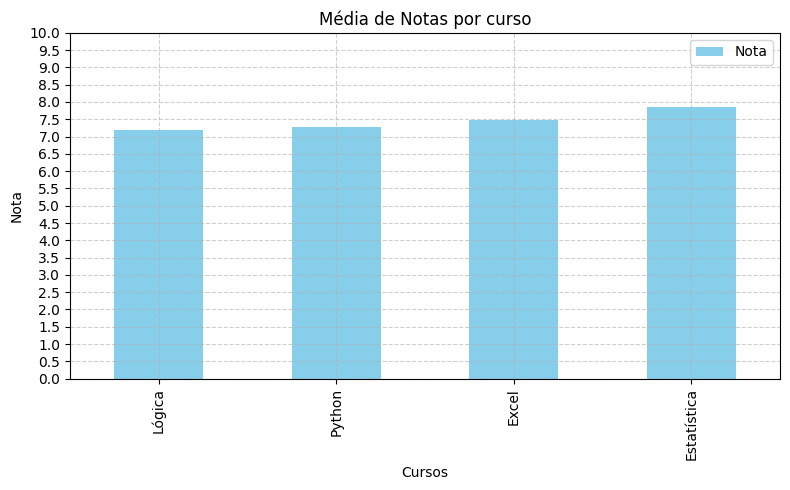

In [25]:
#média de notas por curso - ordenado do menor para o maior - definindo uma coluna para o indice
# criar gráfico para essa média
# diminuir o intervalo do eixo y
# apresentar o grid na impressao do grafico

import numpy as np
import matplotlib.pyplot as plt
media_notas = df.groupby('Curso')['Nota'].mean().sort_values(ascending=True).reset_index()

# definir y_min and y_max
y_min = 0
y_max = 10

ax = media_notas.plot(
    kind='bar',
    x='Curso',
    color='skyblue',
    figsize=(8,5),
    title='Média de Notas por curso',
    xlabel='Cursos',
    ylabel='Nota'
    )
ax.set_yticks(np.arange(np.floor(y_min*2)/2, np.ceil(y_max*2)/2 + 0.5,0.5))
ax.grid(True, linestyle='--', alpha=0.6) # Added grid
plt.tight_layout()
plt.show()

In [ ]:
#número de alunos aprovados por curso
aprov_curso = df.groupby('Curso')['Aprovado'].sum().reset_index()
aprov_curso

In [ ]:
# número de alunos por curso (barra)
import matplotlib.pyplot as plt
df['Curso'].value_counts().plot(
    kind='bar',
    color='red',
    figsize=(8,5),
    title='Número de alunos por curso',
    xlabel='Cursos',
    ylabel='Número de alunos'
    )
plt.tight_layout()
plt.show()

In [ ]:
#Distribuição por desempenho (pizza)

df['Desempenho'].value_counts().plot(
    kind='pie',
    figsize=(8,5),
    title='Desempenho dos alunos',
    ylabel= '',
    autopct='%1.1f%%',
    shadow=True
)
plt.tight_layout()
plt.show()


In [ ]:
#Frequencia de Notas por curso (linha)
df.groupby('Curso')['Nota'].plot(
    kind='line',
    legend=True,
    figsize=(8,5),
    title='Frequencia de notas por curso',
    xlabel='Cursos',
    ylabel='Notas'
)
plt.tight_layout()
plt.show()

In [ ]:
#Frequencia de Notas por curso (linha)
curso = 'Estatística'
df[df['Curso']  == curso].plot(
    kind='line',
    legend=True,
    y='Nota',
    figsize=(8,5),
    title=f'Frequencia de notas por curso {curso}',
    xlabel='Cursos',
    ylabel='Notas'
)
plt.tight_layout()
plt.show()